In [1]:
%load_ext autoreload

In [17]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('../../analysis')))
from xa.proc.exp import Experiment

x = Experiment(
    name="Asymmetric Run 1h",
    i1='sockshop-2023-11-05T15-27-22/asym1h/1',
    i2='sockshop-2023-11-05T15-27-22/asym1h/2',
    i3='sockshop-2023-11-05T15-27-22/asym1h/3',
    # ... add more iterations here
)

In [18]:
import pandas as pd
import numpy as np

# (un)comment for selecting display precision for floats
pd.options.display.float_format = None # reset
pd.options.display.float_format = np.format_float_positional # dynamic
# pd.options.display.float_format = "{:.2f}".format # fixed

# N = number of elements
# numpy.std is biased, divides by N (population), ddof by default is 0
# pandas.std is unbiased, divides by N-1 (sample), ddof by default is 1

x.stats

count               mean           std bias  \
iter stat                                                                
i1   cpu usage            10887. 1.9691154778175806 2.5005204723627394   
     memory usage         10887. 0.7765605160282907 0.8722620382927705   
     request latency       3600.  7201936.831666667 126370800.23499072   
     request throughput    3600. 10.561282525959104 3.2311954086776282   
     response time      1535673.  4.274779262931187  7.199461609358348   
i2   cpu usage            10888. 2.5048134627112417 3.6272708454184146   
     memory usage         10888. 0.7738057406318883  0.878195196924127   
     request latency       3600. 7319090.4591666665  126329486.3261292   
     request throughput    3600. 10.559822173471991 3.2288625021362876   
     response time      1543763. 4.2573750157817605   7.26752347321684   
i3   cpu usage            10892. 2.2431909583180314 3.0019317763021838   
     memory usage         10892. 0.7730359905435182  0.868899099634257   
     request latency       3600.         7366815.34 126343671.65340196   
     request throughput    3600. 10.558376779241893  3.226197652624628   
     response time      1543384.  4.259414979890193  7.269096295916838   

                                std unbias                min  \
iter stat                                                       
i1   cpu usage          2.5006353200133846           0.003782   
     memory usage        0.872302100850527             0.0309   
     request latency     126388355.3924325           1947291.   
     request throughput  3.231644279334608  1.120241115898175   
     response time       7.199463953433267          0.0000001   
i2   cpu usage           3.627437428846155           0.004093   
     memory usage       0.8782355282840841           0.030498   
     request latency    126347035.74433237           1992610.   
     request throughput 3.2293110487109504 1.1207005593634283   
     response time       7.267525827051918          0.0000001   
i3   cpu usage            3.00206959022519           0.003816   
     memory usage       0.8689389894127532           0.031327   
     request latency    126361223.04220003           1992383.   
     request throughput 3.2266458290041777 1.1205138680981552   
     response time       7.269098650839472          0.0000001   

                                        25%                50%  \
iter stat                                                        
i1   cpu usage                    0.3629275           0.661258   
     memory usage       0.21668500000000002           0.359985   
     request latency              4941649.5          5332382.5   
     request throughput   9.074775133346467  9.114855557401853   
     response time              0.000075207        0.000206621   
i2   cpu usage                   0.36408275 0.7858780000000001   
     memory usage                  0.163951           0.362716   
     request latency             5014404.75          5411280.5   
     request throughput   9.072425791466443  9.113820837875931   
     response time              0.000076908         0.00020942   
i3   cpu usage          0.35851999999999995 0.7297130000000001   
     memory usage                  0.174182           0.346242   
     request latency             5026140.75          5418148.5   
     request throughput   9.073639683655077   9.11413681554247   
     response time              0.000077007         0.00020892   

                                       75%                max  \
iter stat                                                       
i1   cpu usage                   2.5993455          13.701354   
     memory usage                 1.216578           5.272011   
     request latency            5682681.75        7587888192.   
     request throughput 11.038470323146901 22.918104610619803   
     response time            15.103129538      524.118770397   
i2   cpu usage          2.9600617500000004          28.806635   
     memory usage  

In [19]:
x.summary

,mean of means,std of means bias,std of means unbias
cpu usage,2.2390399662822844,0.21871748262075885,0.2678731151234534
response time,4.26385641953438,0.007768386546093812,0.009514291581315816
memory usage,0.7744674157345658,0.0015130389793018074,0.0018530867301154534
request throughput,10.559827159557662,0.0011862713691600272,0.0014528797754574218
request latency,7295947.543611112,69272.05561102256,84840.59484035282


In [5]:
%autoreload 2
from xa.draw.plot import Figure, Pairwise

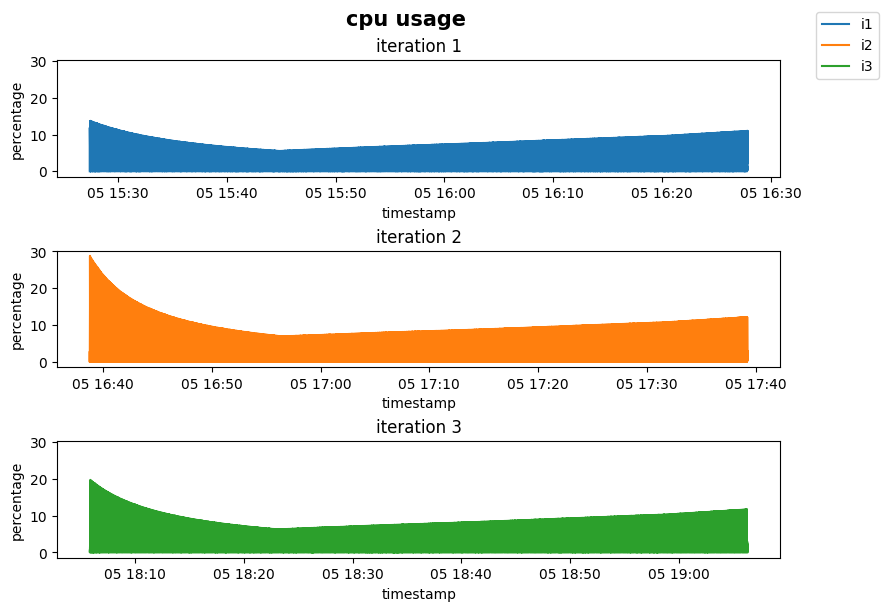

In [14]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.cpu.usage.TS, y=x.i1.metric.cpu.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.cpu.usage.TS, y=x.i2.metric.cpu.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.cpu.usage.TS, y=x.i3.metric.cpu.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='cpu usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

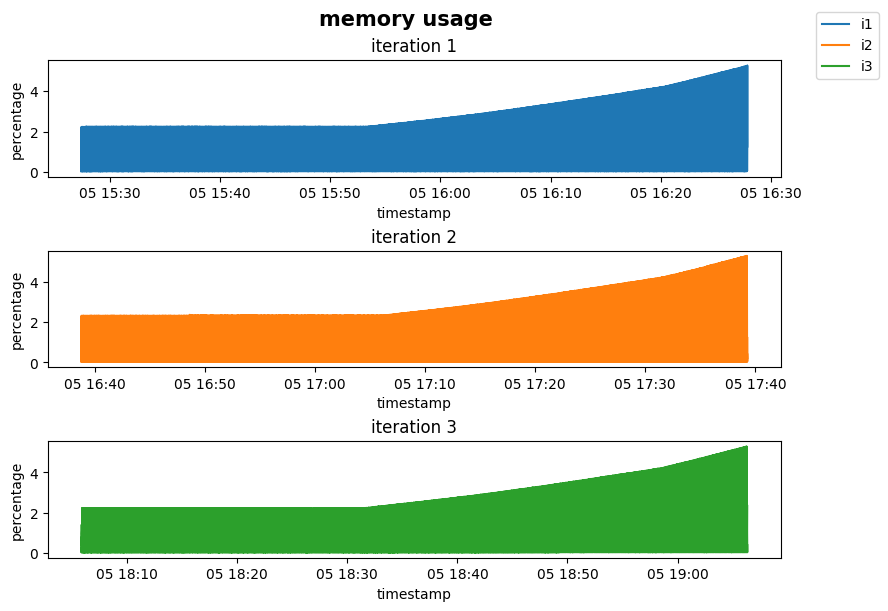

In [15]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.memory.usage.TS, y=x.i1.metric.memory.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.memory.usage.TS, y=x.i2.metric.memory.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.memory.usage.TS, y=x.i3.metric.memory.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='memory usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

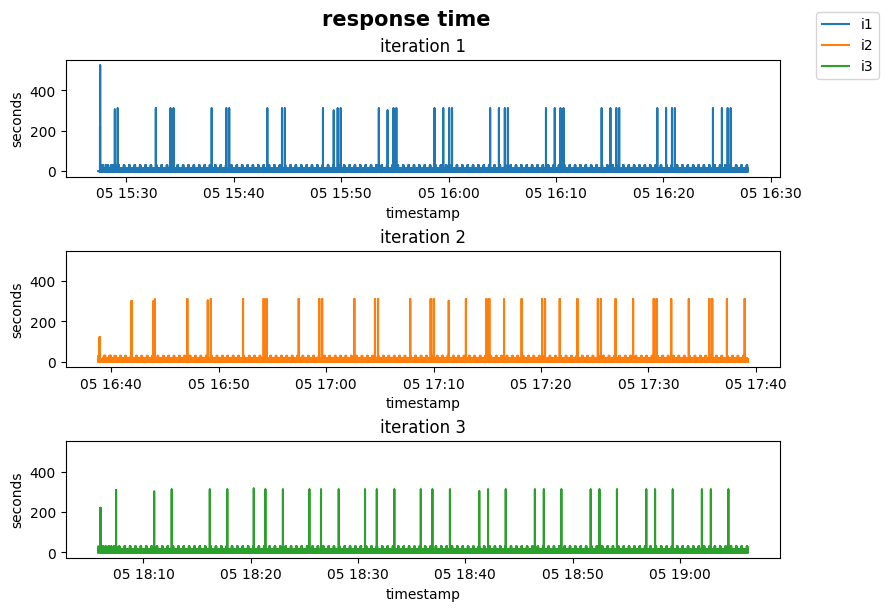

In [16]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.response.time.TS, y=x.i1.metric.response.time.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.response.time.TS, y=x.i2.metric.response.time.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.response.time.TS, y=x.i3.metric.response.time.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='response time', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

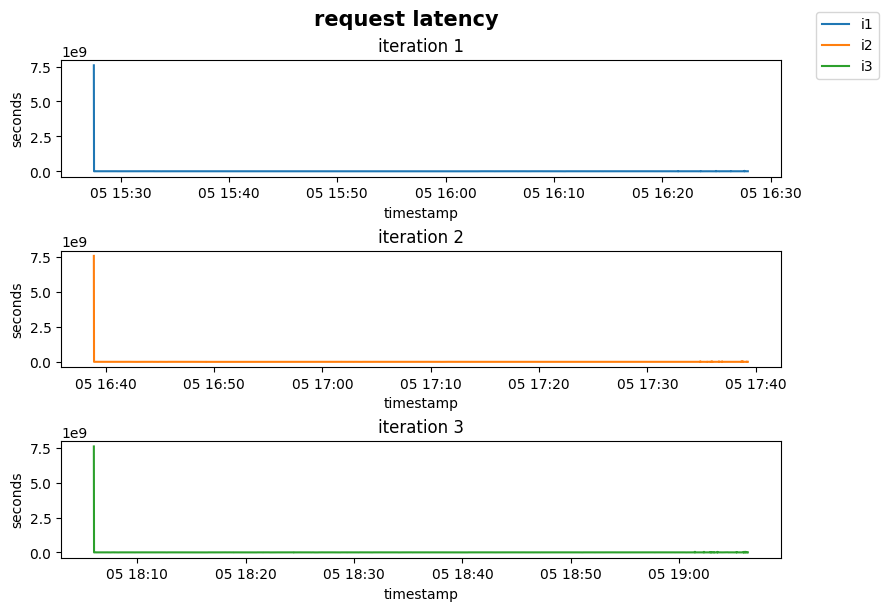

In [13]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.latency.TS, y=x.i1.metric.request.latency.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.request.latency.TS, y=x.i2.metric.request.latency.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.request.latency.TS, y=x.i3.metric.request.latency.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='request latency', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

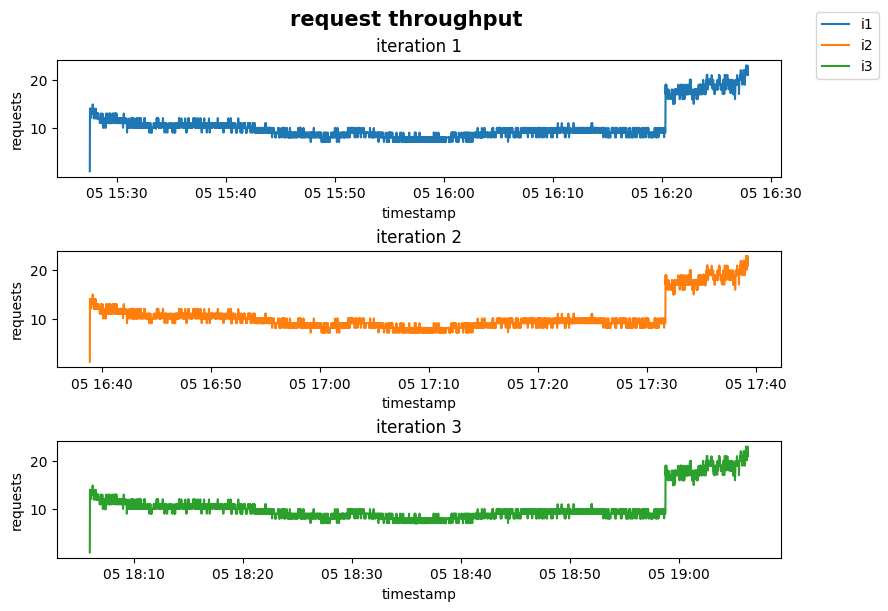

In [12]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.throughput.TS, y=x.i1.metric.request.throughput.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i2.metric.request.throughput.TS, y=x.i2.metric.request.throughput.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i3.metric.request.throughput.TS, y=x.i3.metric.request.throughput.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='requests'),
    title='request throughput', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig